In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML

# Schelling's segregation model
# https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation

In [2]:
# function to create the board
def create_board(N):
    board = np.random.choice([1,0,-1], N*N, p=[4.5/10,1/10,4.5/10]).reshape(N,N)
    return board

# function to update the board
def update_board_old(board, N, threshold):
    # create a copy of the board
    new_board = board.copy()
    # we update the board 1 random cell at a time and return the new board
    # select a random cell
    i = np.random.randint(N)
    j = np.random.randint(N)
    # if the cell is empty, select another cell
    while board[i,j] == 0:
        i = np.random.randint(N)
        j = np.random.randint(N)
    # if the cell is occupied, check how many non-empty neighbors it has (edge cases don't count)
    non_empty_n = np.sum(board[max(0,i-1):min(N,i+2), max(0,j-1):min(N,j+2)] != 0) - 1 # -1 to remove the cell itself, max(0, i-1) to avoid negative indices when i = 0
    # get cell type
    cell_type = board[i,j]
    # get the number of like neighbors
    like_n = np.sum(board[max(0,i-1):min(N,i+2), max(0,j-1):min(N,j+2)] == cell_type) - 1
    # create f
    f = like_n / non_empty_n
    # print(f)
    # if f < threshold, move the cell to a random empty cell
    if f < threshold:
        # find all empty cells
        empty_cells = np.argwhere(board == 0) # argwhere returns the indices of the elements equal to 0 in this case (list of indices)
        # select a random empty cell
        empty_cell = empty_cells[np.random.randint(len(empty_cells))] # select a random empty cell
        # move the cell to the empty cell
        new_board[empty_cell[0], empty_cell[1]] = cell_type # move the cell
        new_board[i,j] = 0 # remove the cell from its original position
    # return the new board
    return new_board

def update_board_multi(board, N, threshold):
    new_board = board.copy()
    moved = False
    # get indices of non-empty cells
    non_empty_cells = np.argwhere(new_board != 0)
    # shuffle to randomize order
    np.random.shuffle(non_empty_cells)

    # list to store unsatisfied cells
    unsatisfied_cells = []

    # identify unsatisfied cells
    for i, j in non_empty_cells:
        neighborhood = new_board[max(0, i-1):min(N, i+2), max(0, j-1):min(N, j+2)]
        non_empty_n = np.count_nonzero(neighborhood)
        like_n = np.count_nonzero(neighborhood == new_board[i, j])

        # exclude the cell itself
        if new_board[i, j] != 0:
            non_empty_n -= 1
            like_n -= 1

        if non_empty_n > 0:
            f = like_n / non_empty_n
            if f < threshold:
                unsatisfied_cells.append((i, j))

    # randomly move a subset of unsatisfied cells
    for i, j in unsatisfied_cells:
        empty_cells = np.argwhere(new_board == 0)
        if empty_cells.size > 0:
            empty_cell = empty_cells[np.random.choice(empty_cells.shape[0])]
            new_board[empty_cell[0], empty_cell[1]] = new_board[i, j]
            new_board[i, j] = 0

    if len(unsatisfied_cells) > 0:
        moved = True

    return new_board, moved

def update_board_single(board, N, threshold):
    new_board = board.copy()
    moved = False 

    # get indices of non-empty cells
    non_empty_cells = np.argwhere(new_board != 0)
    # shuffle to randomize order
    np.random.shuffle(non_empty_cells) 

    # iterate through non-empty cells to find an unsatisfied cell
    for i, j in non_empty_cells:
        neighborhood = new_board[max(0, i-1):min(N, i+2), max(0, j-1):min(N, j+2)] # get the neighboring 8 cells using slicing (i.e. max(0, i-1) would return 0 if i-1 < 0)
        non_empty_n = np.count_nonzero(neighborhood)
        like_n = np.count_nonzero(neighborhood == new_board[i, j])

        # exclude the cell itself
        if new_board[i, j] != 0:
            non_empty_n -= 1
            like_n -= 1

        if non_empty_n > 0 and like_n / non_empty_n < threshold:
            # move the first unsatisfied cell found
            empty_cells = np.argwhere(new_board == 0)
            if empty_cells.size > 0:
                empty_cell = empty_cells[np.random.choice(empty_cells.shape[0])]
                new_board[empty_cell[0], empty_cell[1]] = new_board[i, j]
                new_board[i, j] = 0
                moved = True 
                break  # stop after moving one cell

    return new_board, moved

# function to plot the board
def plot_board(board, N, threshold):
    # create a figure
    fig = plt.figure()
    # create an axis
    ax = fig.add_subplot(111)
    # plot the board
    ax.imshow(board, cmap='bwr', vmin=-1, vmax=1)
    # set the title
    ax.set_title('Schelling\'s segregation model (threshold = {})'.format(threshold))
    # remove the axis
    ax.axis('off')
    # show the plot
    plt.show()

# Function for animating the list of states/frames
def animate_board(state_list, interval=40):
    fig,ax = plt.subplots()
    fig.set_size_inches(8,8)

    im = ax.imshow(state_list[0], cmap='bwr')
    im.set_cmap('bwr')

    def animate(frame_number):
        im.set_data(state_list[frame_number])
        return im
        
    animation = anim.FuncAnimation(fig, animate, frames=len(state_list), interval=interval)

    
    return HTML(animation.to_jshtml())

In [3]:
SIZE = 32
THRESH = 1/3
board = create_board(SIZE)
board_list = []
num_iterations = 0
while True:
    board_list.append(board)
    board, moved = update_board_single(board, SIZE, THRESH)
    num_iterations += 1
    if not moved:
        break


print('Number of iterations to reach equilibrium (SINGLE): {}'.format(num_iterations))
animate_board(board_list, interval=50)

Number of iterations to reach equilibrium (SINGLE): 429


In [ ]:
board = create_board(SIZE)
board_list_2 = []
num_iterations = 0
while True:
    board_list_2.append(board)
    board, moved = update_board_multi(board, SIZE, THRESH)
    num_iterations += 1
    if not moved:
        break

print('Number of iterations to reach equilibrium (MULTI): {}'.format(num_iterations))
animate_board(board_list_2, interval=50)

Threshold: 0.0 done
Threshold: 0.125 done
Threshold: 0.25 done
Threshold: 0.375 done
Threshold: 0.5 done
Threshold: 0.625 done
Threshold: 0.75 done
Threshold: 0.875 done


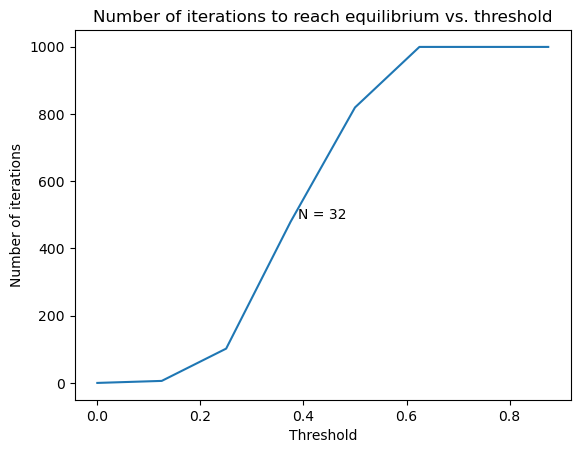

In [84]:
# function to run the simulation through different thresholds.  saving the number of iterations to reach equilibrium for each threshold
# then plotting the number of iterations vs. threshold
def run_simulation(N, threshold_list, num_iterations):
    num_iterations_list = []
    # loop through the thresholds
    for threshold in threshold_list:
        # create a board
        board = create_board(N)
        # loop through the iterations
        for i in range(num_iterations):
            # update the board
            board, moved = update_board_single(board, N, threshold)
            # if no cells moved, break
            if not moved:
                break
        # append the number of iterations to the list
        num_iterations_list.append(i)
        print('Threshold: {} done'.format(threshold))
    # plot the number of iterations vs. threshold
    plt.plot(threshold_list, num_iterations_list)
    plt.xlabel('Threshold')
    plt.ylabel('Number of iterations')
    plt.title('Number of iterations to reach equilibrium vs. threshold')
    # board size
    plt.text(0.5, 0.5, 'N = {}'.format(N), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.show()

thresh_list = [0/8, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8]
run_simulation(32, thresh_list, 1000)